In [12]:
import pandas as pd

In [13]:
df1 = pd.read_excel("Capital Not Deployed L6.xlsx")
df1.tail()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,CAPEX Growth,Debt Growth
18,19,220889,Orient Green Power Company Ltd.,750.7240,739.7997,677.903772,1.086000,357.835100,174.508600,74.150000,-99.377681,382.582738
19,20,100366,Rolta India Ltd.,165.2700,164.2700,949.476150,3031.430000,1053.540000,3652.440000,679.100000,-17.002606,55.137682
20,21,119260,Sanwaria Consumer Ltd.,73.6100,36.8050,1468.519500,162.363082,18.692254,162.363082,9.378356,0.000000,99.312694
21,22,112179,Sunteck Realty Ltd.,14.6315,12.5932,6196.440250,12.524500,51.332000,12.502200,29.609100,0.178369,73.365621
22,23,102986,Vardhman Textiles Ltd.,57.4300,55.9300,7010.767250,3479.520000,1195.550000,3221.620000,719.350000,8.005289,66.198652


In [14]:
df1['Gross_Plus_CWIP_chg'] = ((df1['Gross_Plus_CWIP']/df1['Gross_Plus_CWIP1'])-1) * 100


#LOWER THE BETTER SO * -1
mean_value = df1['Gross_Plus_CWIP_chg'].mean()
std_dev = df1['Gross_Plus_CWIP_chg'].std()
df1['ZSCORE_CAPEX'] = ((df1['Gross_Plus_CWIP_chg']-mean_value) / std_dev) * (-1)


mean_value = df1['long term borrowing'].mean()
std_dev = df1['long term borrowing'].std()
df1['ZSCORE_DEBTGROWTH'] = (df1['long term borrowing']-mean_value) / std_dev


mean_value = df1['BS_Share Capital'].mean()
std_dev = df1['BS_Share Capital'].std()
df1['ZSCORE_SHARECAPITAL'] = (df1['BS_Share Capital']-mean_value) / std_dev


mean_value = df1['FH_Market Capitalization'].mean()
std_dev = df1['FH_Market Capitalization'].std()
df1['ZSCORE_MCAP'] = (df1['FH_Market Capitalization']-mean_value) / std_dev


df1.head()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,CAPEX Growth,Debt Growth,Gross_Plus_CWIP_chg,ZSCORE_CAPEX,ZSCORE_DEBTGROWTH,ZSCORE_SHARECAPITAL,ZSCORE_MCAP
0,1,132345,Allcargo Gati Ltd.,21.6690,17.636000,966.43740,311.9900,103.5460,309.477000,74.542000,0.812015,38.909608,0.812015,-0.213211,-0.391107,-0.538038,-0.623135
1,2,106074,Arshiya Ltd.,31.2359,31.235894,1037.03188,1261.1917,741.3667,1351.430402,197.290598,-6.677273,275.773963,-6.677273,0.085112,-0.144492,-0.487899,-0.606780
2,3,228011,Arvind Smartspaces Ltd.,31.8676,28.409300,583.97377,9.6961,100.1417,8.898600,45.315600,8.962084,120.987254,8.962084,-0.537856,-0.392424,-0.484588,-0.711742
3,4,132834,Camlin Fine Sciences Ltd.,12.1230,10.371000,1235.33370,101.6575,14.4986,93.151300,11.052500,9.131596,31.179371,9.131596,-0.544608,-0.425538,-0.588067,-0.560839
4,5,111196,Can Fin Homes Ltd.,26.6331,26.622500,6458.63477,28.3625,10680.6689,26.106200,8028.248700,8.642775,33.038590,8.642775,-0.525136,3.698573,-0.512022,0.649260


In [15]:
df2 = pd.read_excel("TRENDLYNE_230425.xlsx")
df2.head()

,Stock Name,NSE Code,BSE Code,Stock Code,ISIN,Industry Name,Current Price,Current Price.1,Market Capitalization,PE TTM Price to Earnings,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,20 Microns Ltd.,20MICRONS,533022.0,20MICRONS,INE144J01027,Coal & Mining,227.25,227.25,801.89,13.19,...,23.96,38.63,9.50,10.88,17.60,7.0,Metals & Mining,Coal & Mining,2024-12-31,2025-01-22
1,360 ONE Gold ETF,GOLD360,544375.0,GOLD360,INF579M01BB5,Others,95.45,95.45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
2,360 ONE Silver ETF,SILVER360,544389.0,SILVER360,INF579M01BC3,Others,99.20,99.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Others,Others,NaT,NaT
3,360 One Wam Ltd.,360ONE,542772.0,360ONE,INE466L01038,Capital Markets,1057.00,1057.00,41613.87,41.27,...,17.25,23.88,5.31,2.86,8.70,3.0,Banking and Finance,Capital Markets,2024-12-31,2025-04-23
4,3B BlackBio Dx Ltd.,NaN,532067.0,3BBLACKBIO,INE994E01018,Agrochemicals,1784.05,1784.05,1531.20,31.87,...,14.53,17.06,12.93,9.90,12.59,7.0,Chemicals & Petrochemicals,Agrochemicals,2024-12-31,2025-02-13


In [16]:
merged_df = pd.merge(df1, df2, how='inner', left_on='Company Name', right_on='Stock Name')
merged_df.head()

,Sr.No.,Accord Code,Company Name,BS_Share Capital,BS_Share Capital1,FH_Market Capitalization,Gross_Plus_CWIP,long term borrowing,Gross_Plus_CWIP1,long term borrowing1,...,Sector Return on Equity ROE,Industry Return on Equity ROE,RoA Annual %,Sector Return on Assets,Industry Return on Assets,Piotroski Score,sector_name,Industry Name.1,Latest financial result,Result Announced Date
0,1,132345,Allcargo Gati Ltd.,21.6690,17.636000,966.437400,311.9900,103.5460,309.477000,74.542000,...,132.52,13.61,1.09,8.54,8.59,7.0,Transportation,Warehousing & Logistics,2024-12-31,2025-02-06
1,2,106074,Arshiya Ltd.,31.2359,31.235894,1037.031880,1261.1917,741.3667,1351.430402,197.290598,...,132.52,13.61,-109.54,8.54,8.59,3.0,Transportation,Warehousing & Logistics,2024-03-31,2024-06-06
2,4,132834,Camlin Fine Sciences Ltd.,12.1230,10.371000,1235.333700,101.6575,14.4986,93.151300,11.052500,...,14.53,14.40,-4.75,9.90,9.72,3.0,Chemicals & Petrochemicals,Specialty Chemicals,2024-12-31,2025-02-14
3,5,111196,Can Fin Homes Ltd.,26.6331,26.622500,6458.634770,28.3625,10680.6689,26.106200,8028.248700,...,17.25,13.79,2.05,2.86,2.65,7.0,Banking and Finance,Housing Finance,2024-12-31,2025-04-23
4,6,132413,Cerebra Integrated Technologies Ltd.,120.3966,108.496600,666.940656,9.1388,0.1046,8.788000,0.038400,...,10.83,7.63,-13.71,5.33,3.71,2.0,Hardware Technology & Equipment,Computer Hardware,2024-12-31,2025-02-13


In [17]:
df3 = pd.read_excel("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/L6 Valuation Data.xlsx")

final_merged_df = pd.merge(merged_df, df3, how='inner', left_on='Company Name', right_on='Company Name')
final_merged_df.head()

mean_value = final_merged_df['FR_Adjusted PE (x)'].mean()
std_dev = final_merged_df['FR_Adjusted PE (x)'].std()
final_merged_df['ZSCORE_PE'] = (final_merged_df['FR_Adjusted PE (x)']-mean_value) / std_dev

mean_value = final_merged_df['FR_EV/EBITDA(x)'].mean()
std_dev = final_merged_df['FR_EV/EBITDA(x)'].std()
final_merged_df['ZSCORE_EVEBITDA'] = (final_merged_df['FR_EV/EBITDA(x)']-mean_value) / std_dev

final_merged_df['ZSCORE_FINAL'] = ((1/5) * final_merged_df['ZSCORE_SHARECAPITAL']) + ((1/5) * final_merged_df['ZSCORE_DEBTGROWTH']) + ((1/5) * final_merged_df['ZSCORE_CAPEX']) + (0.20 * final_merged_df['ZSCORE_MCAP']) + (0.10 * final_merged_df['ZSCORE_PE']) + (0.10 * final_merged_df['ZSCORE_EVEBITDA'])
# final_merged_df['ZSCORE_FINAL'] = (1 * final_merged_df['ZSCORE_CAPEX'])



final_merged_df = final_merged_df[final_merged_df["ZSCORE_FINAL"]>0]

# final_merged_df['PORTFOLIO_WEIGHTS'] = final_merged_df["ZSCORE_FINAL"]/final_merged_df["ZSCORE_FINAL"].sum()

column_list = final_merged_df['Stock Code'].tolist()
# print(column_list)

final_merged_df.head()

final_merged_df.to_csv("rahul_s2l6.csv")

In [7]:
df = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/mega_dateclose_final.csv")
columns_to_keep = ['Date'] + [col for col in column_list if col in df.columns]
filtered_with_date_df = df[columns_to_keep]


filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])
start_date = pd.to_datetime("2018-03-31")
end_date = pd.to_datetime("2021-04-02")
filtered_df = filtered_with_date_df[(filtered_with_date_df['Date'] >= start_date) & (filtered_with_date_df['Date'] <= end_date)]
filtered_df.head()


df_cleaned = filtered_df.dropna(how='all', subset=filtered_df.columns.difference(['Date']))
rows_removed = len(filtered_df) - len(df_cleaned)
# print("ROWS REMOVED i.e. ALL VALUES MISSING EXCEPT DATE:", rows_removed)
df_cleaned.head()


df_fully_cleaned = df_cleaned.dropna(axis=1)
final_columns = df_fully_cleaned.columns.tolist()
if 'Date' in final_columns:
    final_columns.remove('Date')
print(final_columns)
df_fully_cleaned.head()


df_fully_cleaned['Date'] = pd.to_datetime(df_fully_cleaned['Date'])
df_fully_cleaned.set_index('Date', inplace=True)
pct_change_df = df_fully_cleaned.pct_change() 
pct_change_df = pct_change_df.iloc[1:] 
pct_change_df.head()
# pct_change_df.to_csv("gptwork.csv",index=False)



pct_change_df = pct_change_df.reset_index()  # This moves 'Date' from index to a regular column
pct_change_df.head()
# pct_change_df.to_csv("data1.csv",index=False)





# pct_change_df.to_csv("deletenow.csv",index=False)
# nan_counts = pct_change_df.isna().sum()
# print(nan_counts)
# columns_without_nans = df.columns[df.isna().sum() == 0].tolist()
# print(columns_without_nans)

# pct_change_df.dropna

['CANFINHOME', 'GSPL', 'MUTHOOTFIN', 'GREENPOWER', 'ROLTA']


C:\Users\meets\AppData\Local\Temp\ipykernel_25080\766037106.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_with_date_df['Date'] = pd.to_datetime(filtered_with_date_df['Date'])


,Date,CANFINHOME,GSPL,MUTHOOTFIN,GREENPOWER,ROLTA
0,2018-04-03,0.000465,-0.017814,0.007615,0.059459,0.028452
1,2018-04-04,-0.003140,0.000812,-0.003599,0.066327,-0.030919
2,2018-04-05,0.024965,0.019746,0.042018,-0.014354,0.036104
3,2018-04-06,0.032324,0.007692,-0.012825,0.014563,0.004052
4,2018-04-09,-0.003087,0.004738,-0.004565,0.014354,0.005650


In [8]:
# PORTFOLIO WT CALCULATION

final_df = final_merged_df[final_merged_df['Stock Code'].isin([name.upper() for name in final_columns])]
final_df.head()

final_df['PORTFOLIO_WEIGHTS'] = final_df["ZSCORE_FINAL"]/final_df["ZSCORE_FINAL"].sum()
final_df.head()

final_df = final_df[["Stock Code","PORTFOLIO_WEIGHTS"]]
final_df.head(20)
# final_df.to_csv("data2.csv",index=False)

,Stock Code,PORTFOLIO_WEIGHTS
3,CANFINHOME,0.146474
7,GSPL,0.113202
14,MUTHOOTFIN,0.330036
16,GREENPOWER,0.372470
17,ROLTA,0.037819


In [9]:
#DIRECT COPYPASTE - NO EDIT


# Align columns: ensure weights match the columns in the return dataframe
returns_df = pct_change_df.copy()
weights_df = final_df.set_index("Stock Code")["PORTFOLIO_WEIGHTS"]

# Ensure only common stocks are used
common_stocks = returns_df.columns.intersection(weights_df.index)
returns_matrix = returns_df[common_stocks].copy()
weights_vector = weights_df.loc[common_stocks]

# Perform matrix multiplication (dot product) for each date
returns_df["Portfolio Return"] = returns_matrix.dot(weights_vector)

# Show a few results
final_portfolio = returns_df[["Date", "Portfolio Return"]]
final_portfolio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              744 non-null    datetime64[ns]
 1   Portfolio Return  744 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [10]:
#DIRECT COPYPASTE - NO EDIT

df2 = pd.read_csv("C:/Users/meets/AVENTUS_FACTOR-MODEL/SIMPLE STRATEGY/BENCHMARK/BSE500_PCTRETURNS_09-25.csv")
df2['BDP_Date'] = pd.to_datetime(df2['BDP_Date'])

final_portfolio_benchmark = pd.merge(final_portfolio, df2, how='inner', left_on='Date', right_on='BDP_Date')
final_portfolio_benchmark = final_portfolio_benchmark.drop('BDP_Date', axis=1)
final_portfolio_benchmark.set_index('Date', inplace=True)
final_portfolio_benchmark = final_portfolio_benchmark.rename(columns={'Portfolio Return':'Strategy'})
final_portfolio_benchmark.head()
# final_portfolio_benchmark.to_csv("s2l6b.csv")
# final_portfolio_benchmark.to_csv("final_portfolio_benchmarkQ.csv")

,Strategy,BDP_Close
Date,,
2018-04-03,0.023788,0.005786
2018-04-04,0.021980,-0.011007
2018-04-05,0.015778,0.018536
2018-04-06,0.006950,0.002977
2018-04-09,0.004138,0.003774


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2018-04-03   2018-04-03
End Period                 2021-04-01   2021-04-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          38.98%       -2.01%
CAGR﹪                     7.88%        -0.47%

Sharpe                     0.64         0.13
Prob. Sharpe Ratio         85.62%       59.11%
Smart Sharpe               0.51         0.11
Sortino                    0.85         0.19
Smart Sortino              0.68         0.15
Sortino/√2                 0.6          0.14
Smart Sortino/√2           0.48         0.11
Omega                      1.02         1.02

Max Drawdown               -38.39%      -56.81%
Longest DD Days            495          1002
Volatility (ann.)          20.84%       31.27%
R^2                        0.35         0.35
Information Ratio          -0.02        -0.02
Calmar           

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-04-10,2020-03-24,2021-01-05,1002,-56.810512,-51.050024
2,2021-01-11,2021-01-27,2021-04-01,81,-18.135889,-17.855345


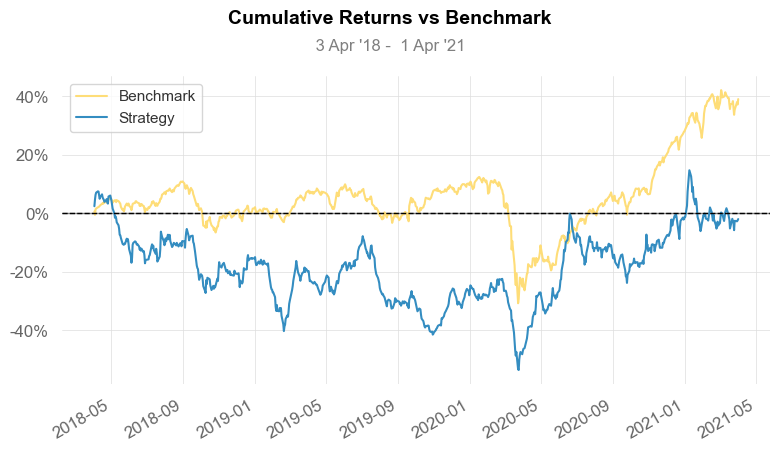

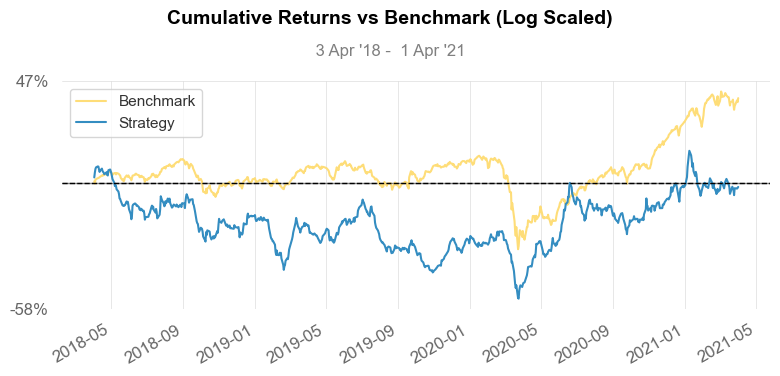

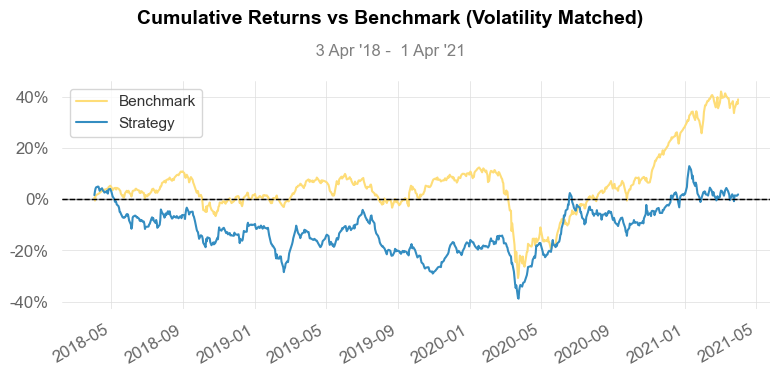

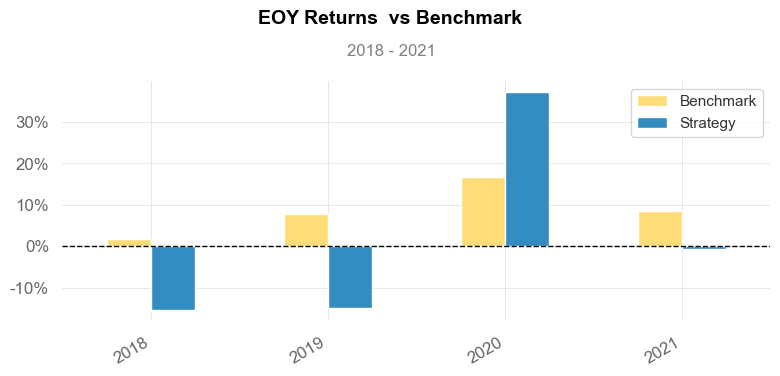

OptionError: No such keys(s): 'mode.use_inf_as_null'

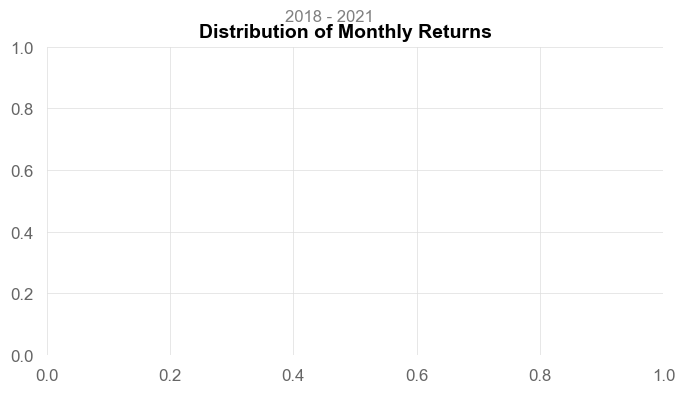

In [11]:
import quantstats as qs

final_portfolio_benchmark.index = pd.to_datetime(final_portfolio_benchmark.index)

qs.reports.full(final_portfolio_benchmark['Strategy'],benchmark = final_portfolio_benchmark['BDP_Close'],mode="full")